<a href="https://colab.research.google.com/github/Nikkiie/Online-Retail-Customer-Segmentation-Unsupervised/blob/main/Online_Retail_Customer_Segmentation_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT TITLE - Online Retail Customer Segmentation**

# **GITHUB LINK:-**

# **PROBLEM DESCRIPTION**

**Your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

**Attribute Information:-**

1> InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

2> StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

3> Description: Product (item) name. Nominal.

4> Quantity: The quantities of each product (item) per transaction. Numeric.

5> InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

6> UnitPrice: Unit price. Numeric, Product price per unit in sterling.

7> CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

8> Country: Country name. Nominal, the name of the country where each customer resides.





# **IMPORTING LIBRARIES**

In [59]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# **Loading the dataset**

In [2]:
#Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Giving the file path

df = pd.read_excel("/content/drive/MyDrive/cap 4/Online Retail.xlsx")

**Dataset First view**

In [ ]:
# First 5 Rows of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Last 5 Rows of dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


**Dataset Rows & Columns count**

In [ ]:
# Data shape
df.shape

(541909, 8)

In [ ]:
#Check all the coloumns present in our dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

**Dataset Information**

In [ ]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Checking Unique Value**

In [ ]:
# Looking for unique values in columns of dataset
for i in df.columns:
  print("Total Unique Values in", i, "-", len(df[i].unique()))

Total Unique Values in InvoiceNo - 25900
Total Unique Values in StockCode - 4070
Total Unique Values in Description - 4224
Total Unique Values in Quantity - 722
Total Unique Values in InvoiceDate - 23260
Total Unique Values in UnitPrice - 1630
Total Unique Values in CustomerID - 4373
Total Unique Values in Country - 38


In [ ]:
# Statistical info.
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Duplicate Values**

In [ ]:
# Checking duplicates
print(len(df[df.duplicated()]))

5268


# **Data Cleaning**

**Looking for Null Values**

In [4]:
# Checking null value
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

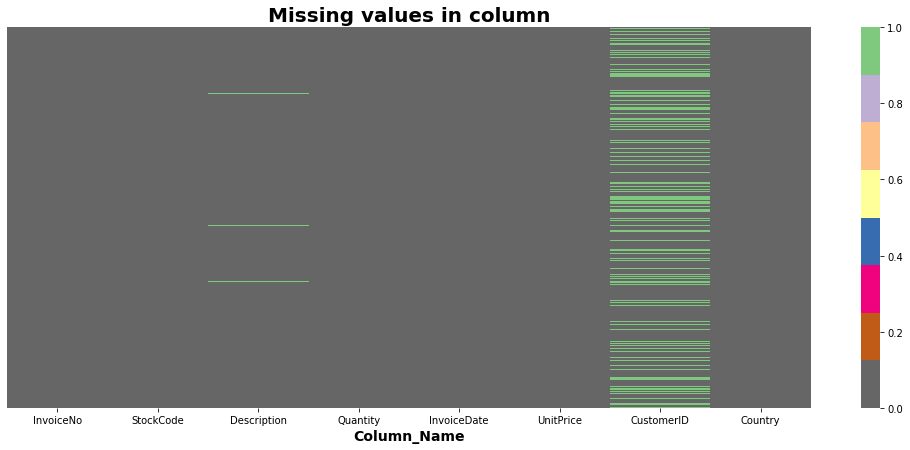

In [5]:
#Plot for visualizing null values
plt.figure(figsize=(18, 7))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap="Accent_r")
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Missing values in column",fontweight="bold",size=20)
plt.show()

* After looking into the plot, we can clearly see that the ColumnID of our dataset has the highest number of NAN values which could impact our result. But with the missing value in Description column are quite less, which could not impact on our result.


In [6]:
#Dropping the missing value from our dataset

df.dropna(inplace=True)

In [7]:
# Checking df information after null value removal

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [8]:
#Dropping the duplicate values from our dataset

df.drop_duplicates(inplace=True)

In [9]:
# Checking df shape after null value and dupplicates removal

df.shape

(401604, 8)

* Hence, after removing the null values from columns 'Description' and 'CustomerID', and dropping of duplicate values our dataset value has been reduced to 401604 from 541909.

# **Data Cleaning**




* "Quantity" and "Unitprice" can never be a Negative value

In [10]:
# Filtering out records with negative values
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]


In [11]:
df.shape

(392692, 8)

* Now, the shape of data is 392692 rows and 8 columns.

# **Exploratory data analysis**

***Top Countries***

In [12]:
#Unique values for top countries
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

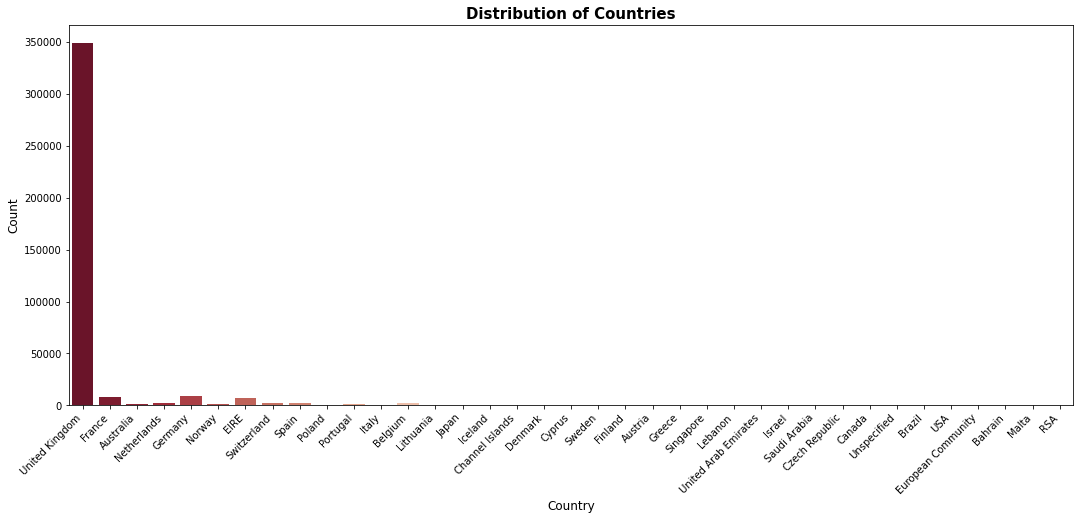

In [13]:
# Plot for distribution of countries

plt.figure(figsize=(18,7))
sns.countplot(x='Country', data = df, palette ='RdBu')
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Countries",fontsize = 15, fontweight="bold")
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Country",fontsize = 12)  
plt.show()

In [14]:
# Dataframe for top countries
top_countries = pd.DataFrame(df['Country'].value_counts().sort_values(ascending = False).reset_index())
top_countries.rename(columns = {'index':'Country','Country':'Total Counts'},inplace = True)
top_countries.head()

,Country,Total Counts
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


***Distribution of customers over a period of one year***

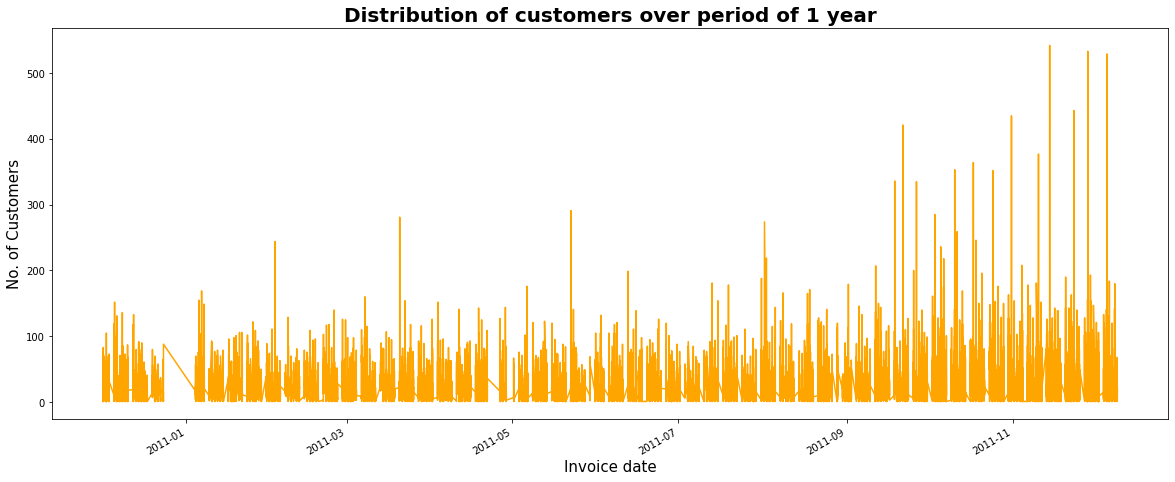

In [15]:
## customer distribution in 1 year time period
plt.figure(figsize=(20,8))
customer_distribution = df.groupby('InvoiceDate').count()['CustomerID'].plot(color='orange')

## Set title and x, y labels
plt.title('Distribution of customers over period of 1 year', size=20, fontweight='bold')
plt.xlabel('Invoice date', size=15)
plt.ylabel('No. of Customers', size=15)
plt.show()

***Top Customers***

In [16]:
# Data frame for customers
top_customers = pd.DataFrame(df['CustomerID'].value_counts().sort_values(ascending = False).reset_index())
top_customers.rename(columns = {'index':'CustomerID','CustomerID':'count'},inplace = True)
top_customers.head()

,CustomerID,count
0,17841.0,7676
1,14911.0,5670
2,14096.0,5111
3,12748.0,4412
4,14606.0,2677


Text(0.5, 1.0, "Top 5 Cusotmer's ID.")

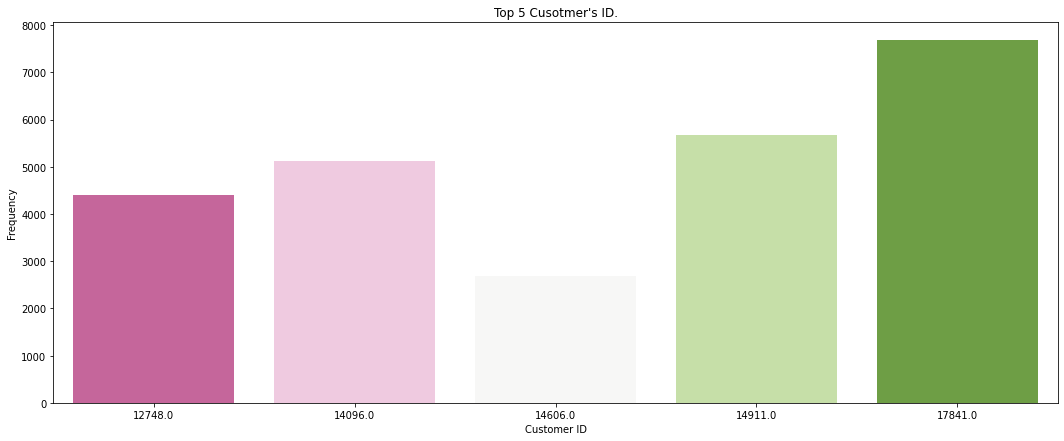

In [17]:
# Plotting top five customers 
plt.figure(figsize = (18,7))
sns.barplot(x = 'CustomerID',y = 'count',palette= 'PiYG',data = top_customers[:5])
plt.xlabel('Customer ID') 
plt.ylabel('Frequency')
plt.title("Top 5 Cusotmer's ID.")

***Description Name***

In [18]:
# Data frame for description name

Description_df = df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
#top 5 Description Name
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


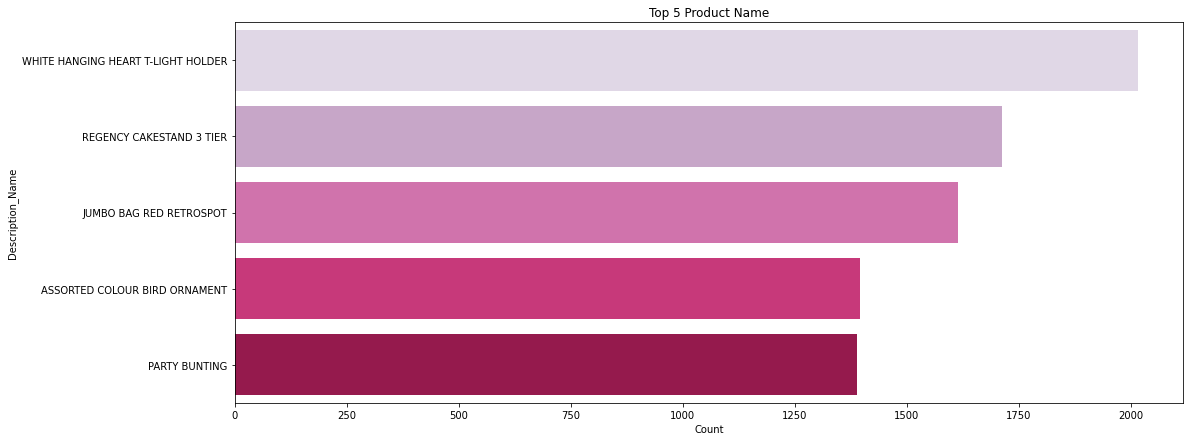

In [19]:
#plot top 5 product name
plt.figure(figsize=(17,7))
plt.title('Top 5 Product Name')
sns.barplot(x='Count',y='Description_Name',data=Description_df[:5], palette='PuRd');

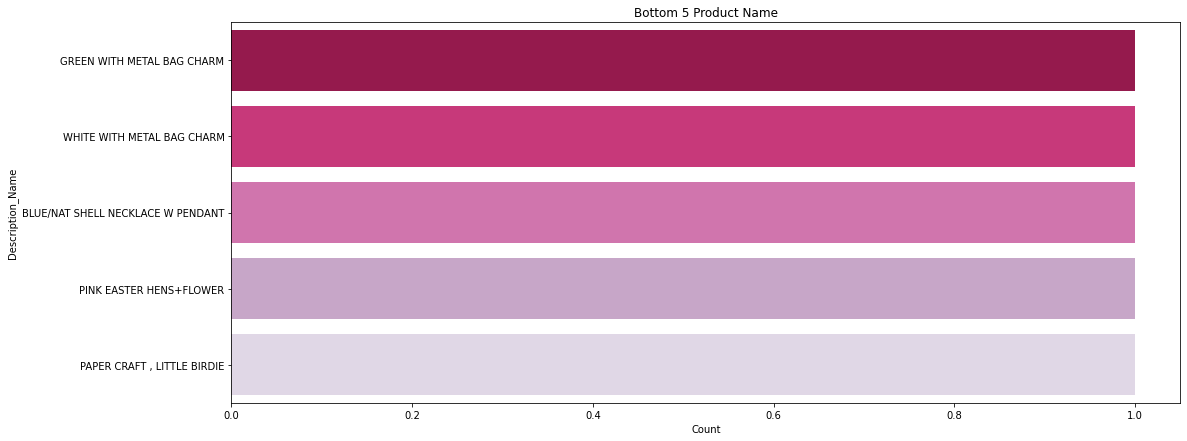

In [20]:
#plot for bottom 5 product name
plt.figure(figsize=(17,7))
plt.title('Bottom 5 Product Name')
sns.barplot(x='Count',y='Description_Name',data=Description_df[-5:], palette='PuRd_r');

***StockCode Name***

In [21]:
# Dataframe for stockCode name
StockCode_df = df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
#top 5 stockcode name
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2023
1,22423,1713
2,85099B,1615
3,84879,1395
4,47566,1389


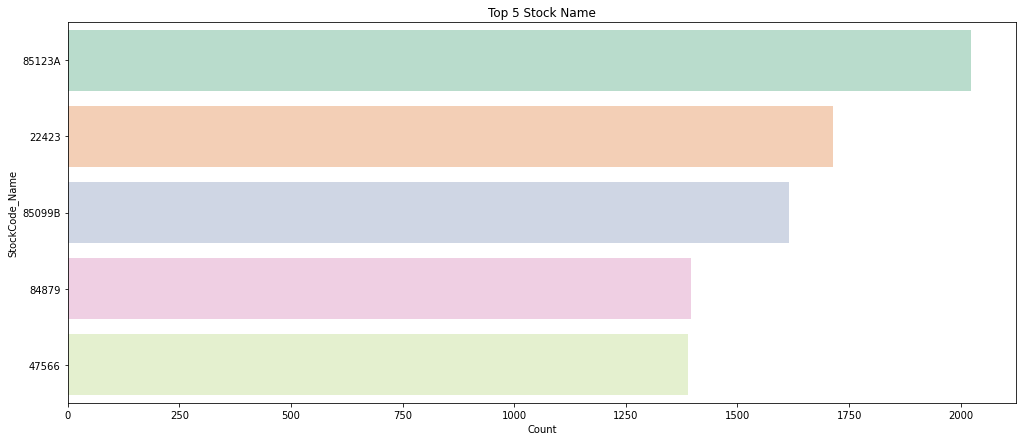

In [22]:
#plot for top 5 stockcode name
plt.figure(figsize=(17,7))
plt.title('Top 5 Stock Name')
sns.barplot(x='Count',y='StockCode_Name',data=StockCode_df[:5], palette='Pastel2');

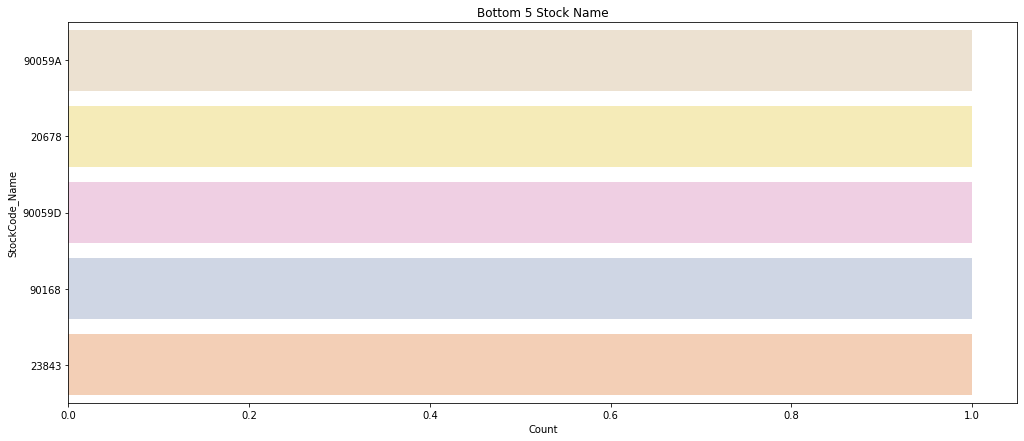

In [23]:
#plot for bottom 5 stockcode name
plt.figure(figsize=(17,7))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='Count',y='StockCode_Name',data=StockCode_df[-5:], palette='Pastel2_r');

***Distribution of Quantity***

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


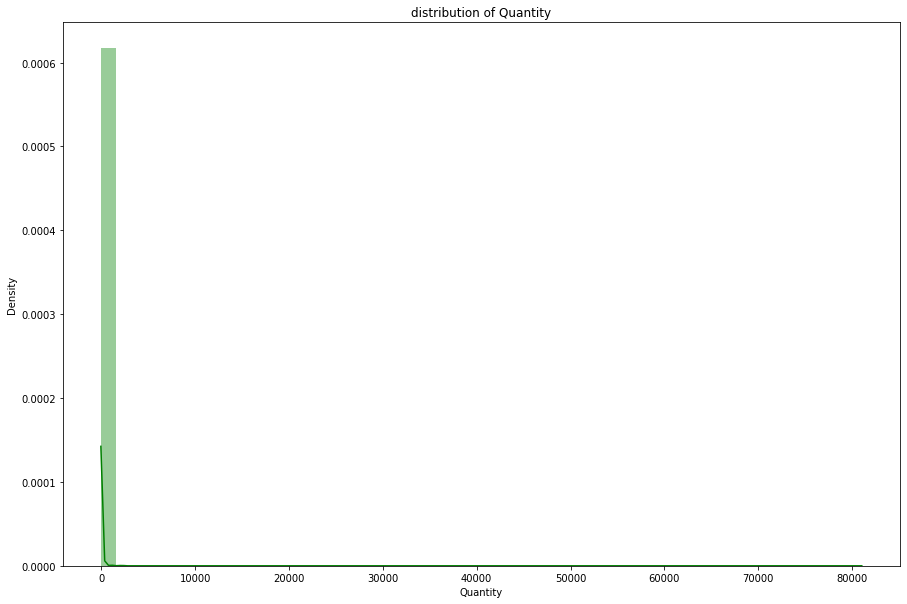

In [24]:
#distribution of Quantity

plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="green");

* Here we can see that it's a Positively skewed distribution. It is a type of distribution in which most values are clustered around the left tail of the distribution.

* Hence, using log transformation.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


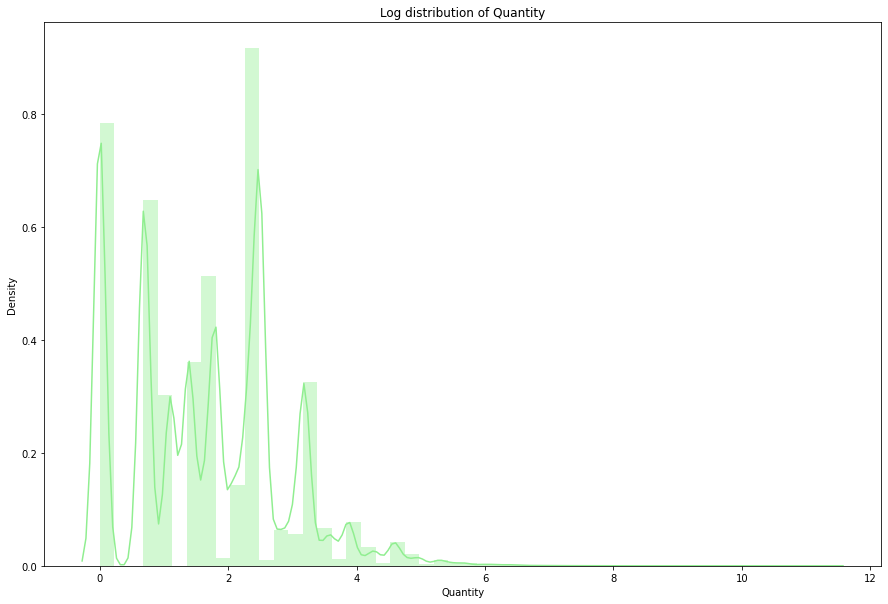

In [25]:
#transforming skewed distribution to symmetrical distribution

plt.figure(figsize=(15,10))
plt.title('Log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="lightgreen");

# **Feature Engineering**

**Converting 'InvoiceDate' column into date time formate**

In [26]:
#Converting InvoiceDate columns into date time format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%Y-%m-%d %H:%M:%S")

**Creating new features from InvoiceDate**

In [27]:
#Creating a new features from Invoicedate
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day']=df['InvoiceDate'].dt.day_name()
df['Hour']=df['InvoiceDate'].dt.hour

**Creating new column Total amount**

In [28]:
#Add new column depicting total amount
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [29]:
#Checking the shape in the dataset after data is cleaned and some added features
df.shape

(392692, 12)

***Months wise Transactions***

In [30]:
#creating month dataframe
month_df = df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


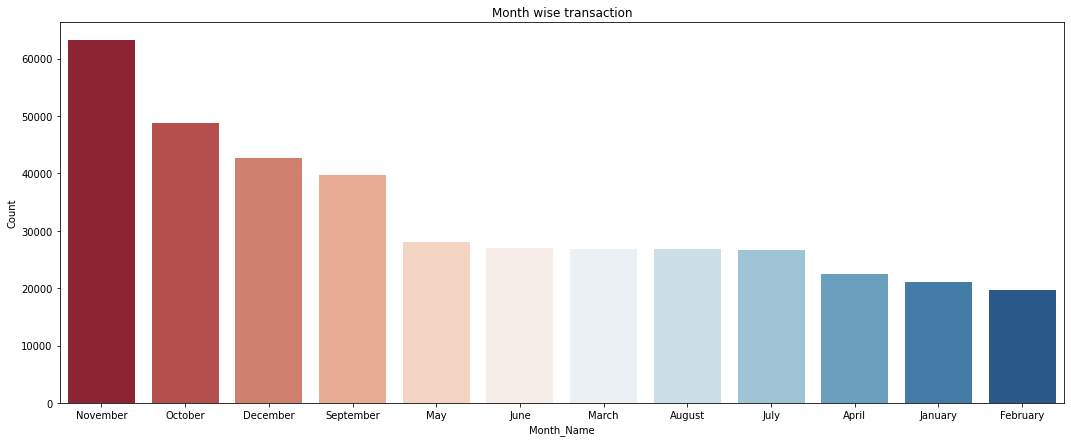

In [31]:
#plotting for month
plt.figure(figsize=(18,7)) #'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', '
plt.title('Month wise transaction')
sns.barplot(x='Month_Name',y='Count',data=month_df,palette='RdBu');

♦ *Most numbers of customers have purchased the gifts in the month of November, October and December.As we all know they have festive season in end of the year as well new year to celebrate so we have highest numbers of transaction in november, october, december as company have most of the customer wholesales who are keeping stocks for festive season.*

♦ *Least numbers of purchasing are in the month of April and February.*

In [32]:
#creating day dataframe
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


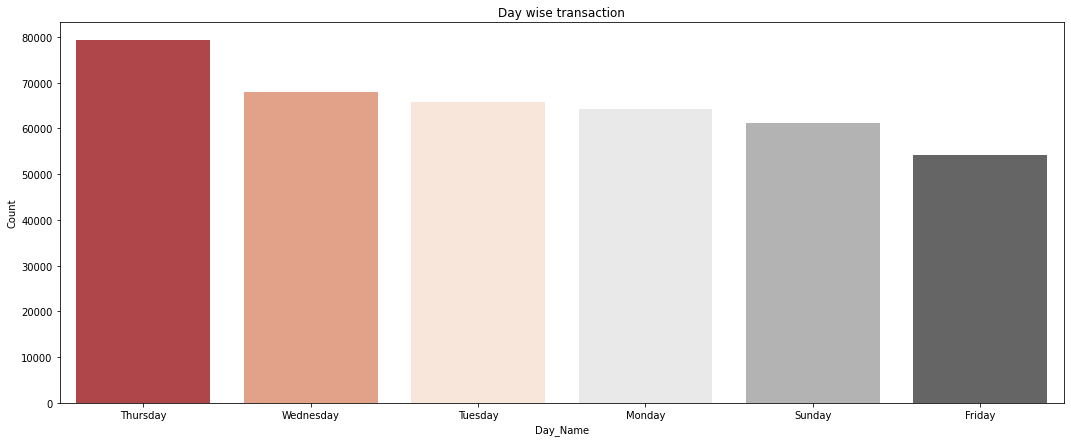

In [33]:
#plotting for days
plt.figure(figsize=(18,7))
plt.title('Day wise transaction')
sns.barplot(x='Day_Name',y='Count',data=day_df, palette='RdGy');

In [34]:
#Creating hour dataframe
hour_df=df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hours'}, inplace=True)
hour_df.rename(columns={'Hour': 'Count'}, inplace=True)
hour_df

,Hours,Count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


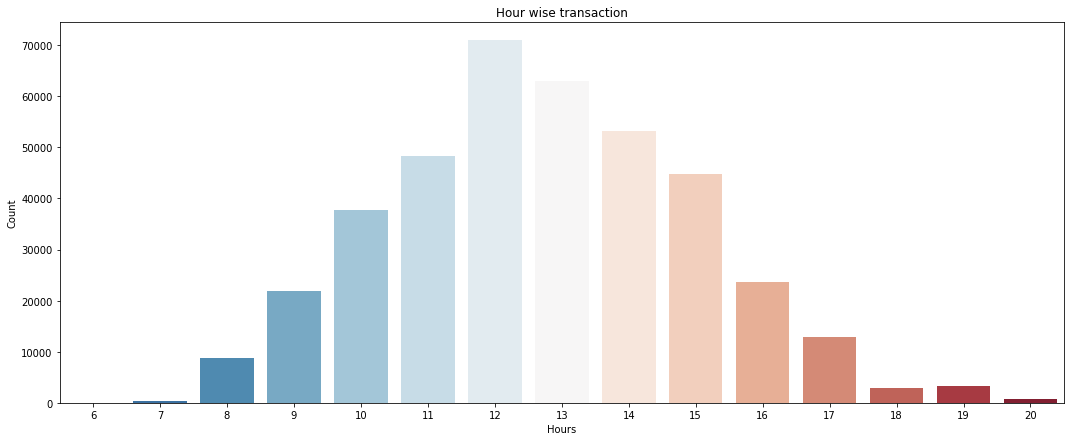

In [35]:
#plotting for hour
plt.figure(figsize=(18,7))
plt.title('Hour wise transaction')
sns.barplot(x='Hours',y='Count',data=hour_df, palette= 'RdBu_r');

* From the above graph we can say that most numbers of purchasing is done between 12pm clock to 3pm.

***Duration of Day***

In [36]:
#dividing hours into morning, afternoon and evening
def time_type(time):
  if(time>=6 and time<=11):
    return 'Morning'
  elif(time>=12 and time<=17):
    return 'Afternoon'
  else:
    return 'Evening'

In [37]:
#applying function we created on hour column
df['Time_type']=df['Hour'].apply(time_type)

<AxesSubplot:title={'center':'Time_type wise transaction'}, xlabel='Time_type', ylabel='count'>

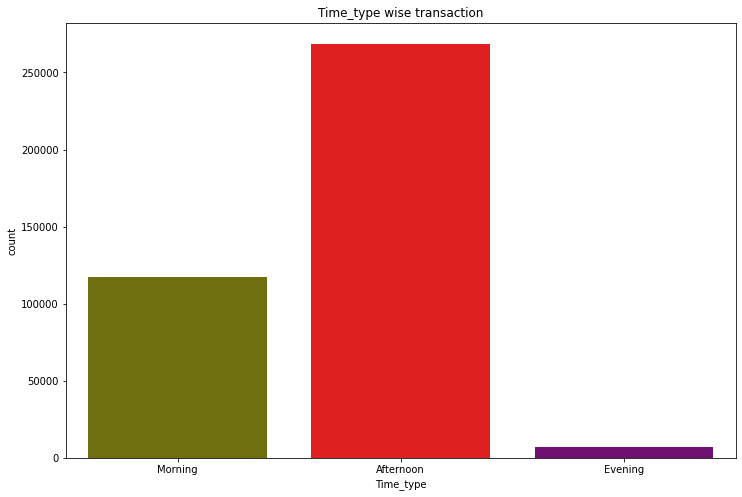

In [38]:
#plotting for time type
plt.figure(figsize=(12,8))
plt.title('Time_type wise transaction')
sns.countplot(x='Time_type',data=df, palette='brg_r') #'bone', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r'

# **RFM Modelling**

**Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. Also, it is used in database marketing and direct marketing and has received particular attention in retail and professional services industries **

* RFM stands for the three dimensions:

**Recency – Customers who made purchases recently.**

**Frequency – How often do they purchase?**

**Monetary – How much do they spend?**

***Performing RFM Segmentation and RFM Analysis***

In [39]:
import datetime as dt
#Setting Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase

Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMScores = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                            'InvoiceNo': lambda x: len(x), 
                                            'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

In [40]:
# First 5 values.
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [41]:
#Descriptive statistics of Recency
RFMScores.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

In [42]:
#Descriptive statistics of Frequency
RFMScores.Frequency.describe()

count    4338.000000
mean       90.523744
std       225.506968
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

In [43]:
#Descriptive statistics of Monetary
RFMScores.Monetary.describe()

count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: Monetary, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


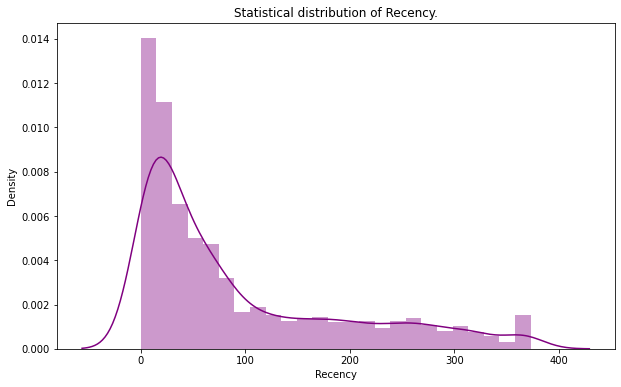

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


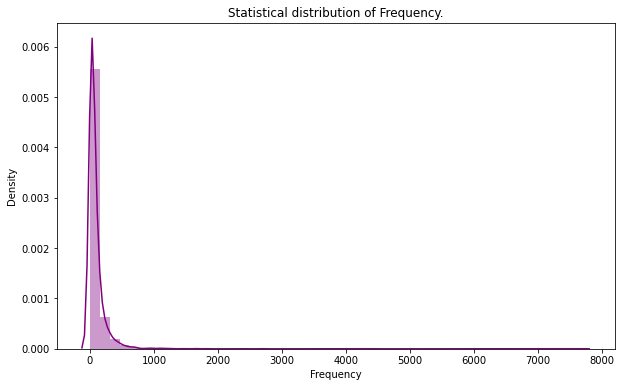

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


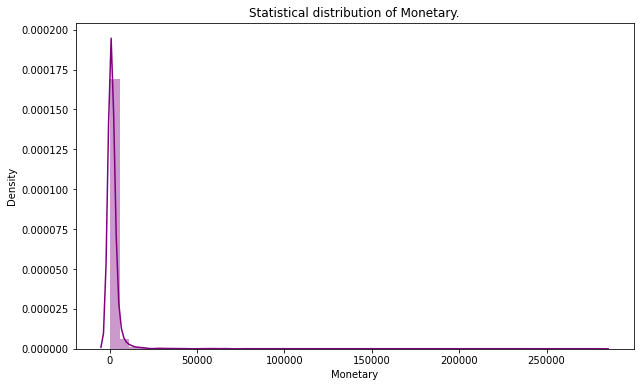

In [44]:
# Function to check for skewness in Recency, Frequency and Monetary
for col in RFMScores:
  fig=plt.figure(figsize=(10,6))
  ax=fig.gca()
  feature = (RFMScores[col])
  sns.distplot(RFMScores[col], ax=ax, color='purple')
  ax.set_title(f'Statistical distribution of {col}.')
  plt.show()

--> *Recency is left skewed*

--> *Frequency is left skewed*

--> *Monetary is left skewed*

**Quantile Split**

In [45]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.48249999999996,
  0.5: 668.5700000000002,
  0.75: 1660.5974999999999}}

In [46]:
#Functions to create R, F and M segments

def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

# Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))        

In [ ]:
# Fisrt 5 values.
RFMScores.head()


In [48]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11




**RFMScore:** It is the sum of R, F and M value that assigned by quantiles.

**RFMGroup:** This is the combination of R,F, and M values.

In [49]:
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


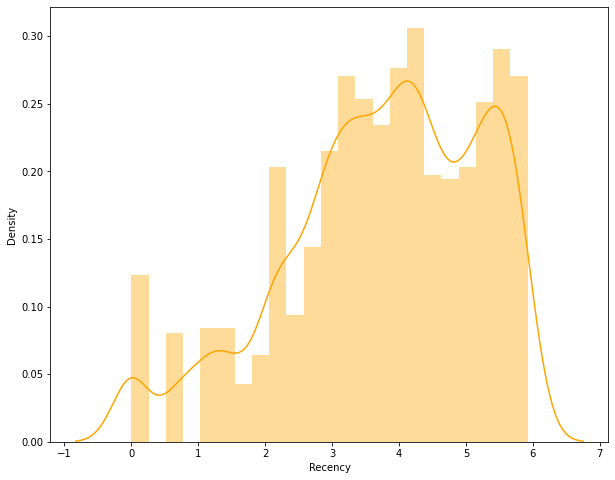

In [53]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(10,8))
sns.distplot(Recency_Plot,color='orange');

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


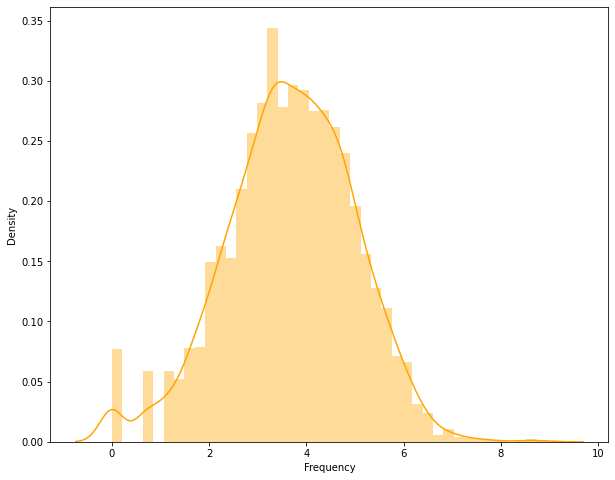

In [54]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(Frequency_Plot,color='orange');

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


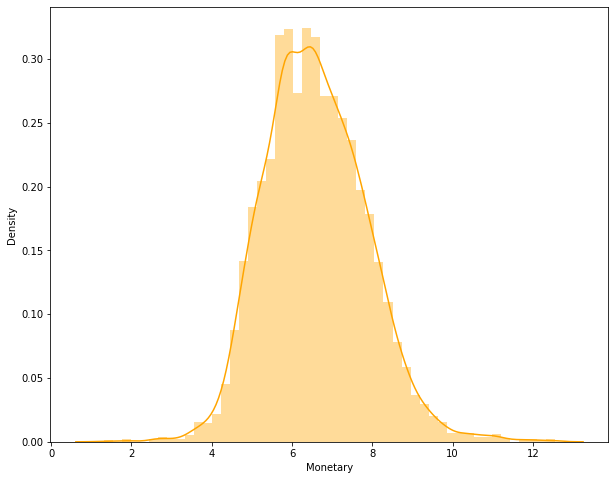

In [55]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(Monetary_Plot,color='orange');

* As we can see from the above plots, after log transformation skewness has been removed from the data.

# **Pre-Processing of RFM dataframe**

In [56]:
from numpy import math
from sklearn import preprocessing
RFMScores['Recency_log'] = RFMScores['Recency'].apply(math.log)
RFMScores['Frequency_log'] = RFMScores['Frequency'].apply(math.log)
RFMScores['Monetary_log'] = RFMScores['Monetary'].apply(math.log)

# **Clustering**


**K-Means Clustering on Recency and Monetary**

* Clustering is an unsupervised classification techinque to understand the groups of classes in the data. 

* We use the K-means clustering algorithm to determine the ideal segments of customers.

* KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, methods such as silhouette analysis and elbow method can be used.

* These methods will help in selection of the optimum number of clusters.

In [57]:
# Importing libraries necessary for clustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

# **Model 1: K-Means Clustering**

**Applying Silhouette Score Method**

* Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.

In [60]:
#silhoutte score
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=RFMScores[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4207311225472853
For n_clusters = 3, silhouette score is 0.3424045169960577
For n_clusters = 4, silhouette score is 0.3650773707181131
For n_clusters = 5, silhouette score is 0.33720389425979497
For n_clusters = 6, silhouette score is 0.3440265006037856
For n_clusters = 7, silhouette score is 0.3476643470699169
For n_clusters = 8, silhouette score is 0.3382400582353
For n_clusters = 9, silhouette score is 0.3460933098989461
For n_clusters = 10, silhouette score is 0.34845890498950244
For n_clusters = 11, silhouette score is 0.3379365852137525
For n_clusters = 12, silhouette score is 0.3451490027405059
For n_clusters = 13, silhouette score is 0.33925352563052436
For n_clusters = 14, silhouette score is 0.3359690556435607
For n_clusters = 15, silhouette score is 0.33830412173621716


***Elbow Method***

* Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. It is an empirical method to find out the best value of k. It picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.

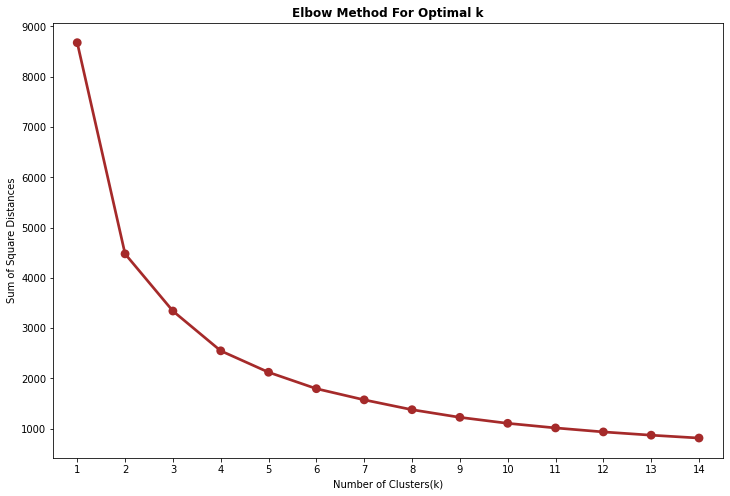

In [61]:
#applying elbow method
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=RFMScores[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='brown')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k',fontweight = 'bold')
plt.show()

In [64]:
#Fitting k-means
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)  #'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot'
y_kmeans= kmeans.predict(X)

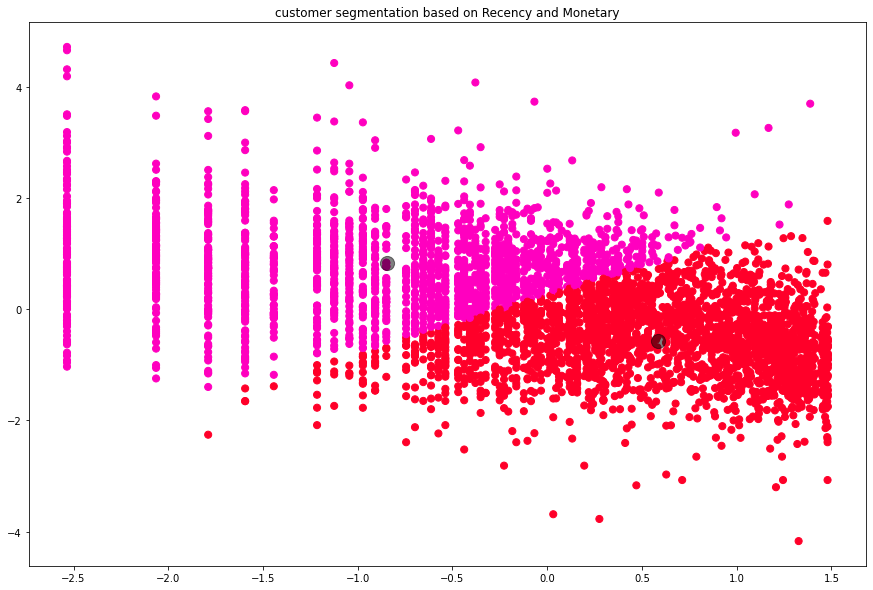

In [72]:
#Plot based on recency and monetary
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='gist_rainbow_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);